# Демодуляция. 
# Часть 3. Double Sideband Suppressed Carrier 
# (AM-DSB-SC)

## 1. Когерентная демодуляция с помощью схемы Костаса

Наиболее популярный метод приема АМ-сигнала с подавленной несущей заключается в использовании схемы Костаса (Costas Loop). Схема приемного устройства представлена ниже:

<img src="../../images/DSB_SC_Receiver_3_1.png" width=500/>

Принцип работы схемы Костаса совпадает с обычной PLL. Сигнал поступает на фазовый детектор PD, где вычисляется расстройка по фазе между несущей и управляемым генератором (NCO). Петлевой фильтр задает динамику системы и убирает лишние шумы.

В отличие от обычной PLL в схеме Костаса используется два фазовых детектора, после которых стоят фильтры нижних частот. Также NCO формирует сразу два гармонических сигнала: $\cos \left(\Phi_г \right)$ и $-\sin \left(\Phi_г \right)$. Разберемся как данная схема работает.

Пусть принятый АМ-сигнал имеет вид:

$$s_{\textrm{am}} \left(t\right)=m\left(t\right)\cdot \cos \left(2\pi f_c t\right),$$

где $m\left(t\right)$ - информационное сообщение, $f_c$ - частота несущей. Как было сказано в DSB SC Receiver Part 2 изменение знака информационного сообщения $m\left(t\right)$ будет приводить к появлению качков фазы несущей на 180 градусов, что негативно скажется на качестве синхронизации. Чтобы избавится от скачков фазы, необходимо сделать так, чтобы амплитуда несущей не изменяла знак.

В схеме Костаса есть две ветви: синфазная (I) и квадратурная (Q). В синфазной ветви АМ-сигнал смешивается с $\cos \left(\Phi_г \right)$, где $\Phi_г \left(t_0 \right)=\Phi_с \left(t_0 \right)-\Delta$, $\Phi_с \left(t_0 \right)$ - фаза несущей, $\Delta$ - расстройка по фазе. В результате получаем:

$$s_I \left(t\right)=m\left(t\right)\cdot \cos \left(\Phi_с \left(t_0 \right)\right)\cdot \cos \left(\Phi_г \left(t_0 \right)\right)=m\left(t\right)\cdot 0\ldotp 5\cdot \cos \left(\Delta \right)+m\left(t\right)\cdot 0\ldotp 5\cdot \cos \left(2\Phi_c \left(t_0 \right)-\Delta \right).$$

Квадратурная ветвь умножается на $-\sin \left(\Phi_г \right)$. Выход фазового детектора для этой ветви равен:

$$s_Q \left(t\right)=m\left(t\right)\cdot \cos \left(\Phi_с \left(t_0 \right)\right)\cdot -\sin \left(\Phi_с \left(t_0 \right)-\Delta \right)=m\left(t\right)\cdot 0\ldotp 5\cdot \sin \left(\Delta \right)-m\left(t\right)\cdot 0\ldotp 5\cdot \sin \left(2\Phi_c \left(t_0 \right)-\Delta \right).$$

После фильтрации сигналы на удвоенной частоте исчезнут, и мы получим:

$$s_{\textrm{Filtered}\;I} \left(t\right)=m\left(t\right)\cdot 0\ldotp 5\cdot \cos \left(\Delta \right),\;\;\;\;s_{\textrm{Filtered}\;Q} \left(t\right)=m\left(t\right)\cdot 0\ldotp 5\cdot \sin \left(\Delta \right)\ldotp$$

Далее сигналы синфазной и квадратурной ветвей перемножаются, и результат подается на вход петлевого фильтра:

$$s_{\textrm{LF}} \left(t\right)=m^2 \left(t\right)\cdot 0\ldotp 25\cdot \cos \left(\Delta \right)\cdot \sin \left(\Delta \right)=m^2 \left(t\right)\cdot 0\ldotp 125\cdot \sin \left(2\Delta \right)\ldotp$$

Таким образом, вход петлевого фильтра не изменяет знак при изменении знака информационного сообщения. В результате преобразований мы опять получаем возведение информационного сообщения в квадрат. Если приемник находится в режиме синхронизации, то есть, когда расстройка по фазе мала, то $\sin \left(2\Delta \right)\approx 2\Delta$. Таким образом, вход петлевого фильтра пропорционален расстройке по фазе. Также при синхронизации фильтрованный сигнал синфазной ветви будет иметь вид:

$$s_{\textrm{Filtered}\;I} \left(t\right)=m\left(t\right)\cdot 0\ldotp 5\cdot \cos \left(\Delta \right)\approx m\left(t\right)\cdot 0\ldotp 5\cdot 1,$$

где учтено, что при малых значениях $\Delta$, $\cos \left(\Delta \right)\approx 1$. Значит, при синхронизации синфазная ветвь будет содержать восстановленное информационное сообщение.

## 2. Когерентная демодуляция с помощью схемы Костаса при квадратурном приеме

Рассмотрим особенности реализации схемы Костаса в случае квадратурного приема. Во много схема совпадает со случаем действительного сигнала. Однако есть и отличия. Теперь NCO также формирует комплексный сигнал. После фазового детектора отсутствует фильтр, и есть блок разделяющий комплексный сигнал на синфазную и квадратурную ветви. Схема приемного устройства представлена ниже:

<img src="../../images/DSB_SC_Receiver_3_2.png" width=500/>

Рассмотрим принцип работы схемы Костаса для квадратурного приема. Сигнал теперь комплексный с односторонним спектром и представлен в виде:

$$s_{\textrm{am}} \left(t\right)=m\left(t\right)\cdot e^{j\cdot 2\pi f_c t},$$

где $m\left(t\right)$ - информационное сообщение, $f_c$ - частота несущей. После умножения на комплексную экспоненту с выхода NCO получим:

$$s_{\textrm{PD}} \left(t\right)=m\left(t\right)\cdot e^{j\cdot \Delta }.$$

где $\Delta$ - расстройка по фазе между несущей и управляемым генератором. Далее формируются сигналы синфазного и квадратурного каналов, которые совпадают с действительной и мнимой частью выхода фвзового детектора. После перемножения каналов получаем, что сигнал на входе петлевого фильтра равен:

$$s_{\textrm{LF}} \left(t\right)=m^2 \left(t\right)\cdot \;\textrm{Re}\left\lbrace e^{j\cdot \Delta } \right\rbrace \cdot \textrm{Im}\left\lbrace e^{j\cdot \Delta } \right\rbrace =m^2 \left(t\right)\cdot \cos \left(\Delta \right)\cdot \sin \left(\Delta \right)=m^2 \left(t\right)\cdot 0\ldotp 5\cdot \sin \left(2\Delta \right).$$

То есть сигнал для петлевого фильтра с точностью до масштабирующего множителя совпадает с сигналом для ранее рассмотренного действительного случая. При синхронизации в синфазной ветви появится восстановленное информационное сообщение.

Для реализации всех рассмотренных выше преобразований был создан класс Costas_complex_pll, описывающий работу PLL по схеме Костаса. Обработка одной пачки отсчетов сигнала запускается с помощью метода step, который возвращает значения частотной расстройки и отсчеты baseband сигнала. 

In [1]:
%matplotlib notebook
%reset -f

import numpy as np
from scipy.signal import firls, lfilter

class Costas_complex_pll:
    
    def __init__(self, 
                 sample_frequency,   # sample frequency in herz
                 noise_bandwidth,    # noise bandwidth in herz
                 damping_factor,     # damping factor
                 central_frequency,  # central NCO frequency in herz
                 signal_amp):        # signal amplitude
        
        self.central_frequency = central_frequency
        self.sample_frequency = sample_frequency
        
        self.ts = 1/self.sample_frequency  # sample time
        BL_n = noise_bandwidth * self.ts   # normalized noise bandwidth
        kd = 0.5 * signal_amp
        ksi = damping_factor
        
        self.kp = 4*ksi*BL_n / (ksi + 0.25/ksi) / kd
        self.ki = 4*BL_n**2 / (ksi + 0.25/ksi)**2 / kd

        # PLL internal variables
        self.NCO_phase = 0
        self.loop_filter_acc = 0
        
    def step(self, input_frame):
        frame_size = input_frame.size
            
        output_frame = np.zeros(frame_size)
        frequency_error = np.zeros(frame_size)
        
        for n in range(frame_size):
            # смешивание с комплексной экспонентой
            mixed_data = input_frame[n] * np.exp(-1j * self.NCO_phase)
            
            # выделение синфазной и квадратурной ветвей
            inphase_data = np.real(mixed_data)
            quadphase_data = np.imag(mixed_data)
            
            # произведение ветвей
            loop_in = inphase_data * quadphase_data
            
            # петлевой фильтр
            kp_out = self.kp * loop_in
            ki_out = self.ki * loop_in + self.loop_filter_acc
            loop_filter_out = kp_out + ki_out

            # обновление состояния накопителя в петлевом фильтре
            self.loop_filter_acc = ki_out;

            # обновление фазы NCO
            self.NCO_phase = self.NCO_phase + loop_filter_out + 2*np.pi*self.central_frequency*self.ts

            # формирование выходных значений
            frequency_error[n] = loop_filter_out / (2*np.pi) * self.sample_frequency 
            output_frame[n] = inphase_data
            
        return frequency_error, output_frame 

Ниже представлен скрипт, выполняющий Ниже представлен скрипт, выполняющий когерентный прием сигнала с подавленной несущей. С помощью переменной freq_offset можно изменять расстройку между частотой несущей и начальной частотой управляемого генератора.

<IPython.core.display.Javascript object>


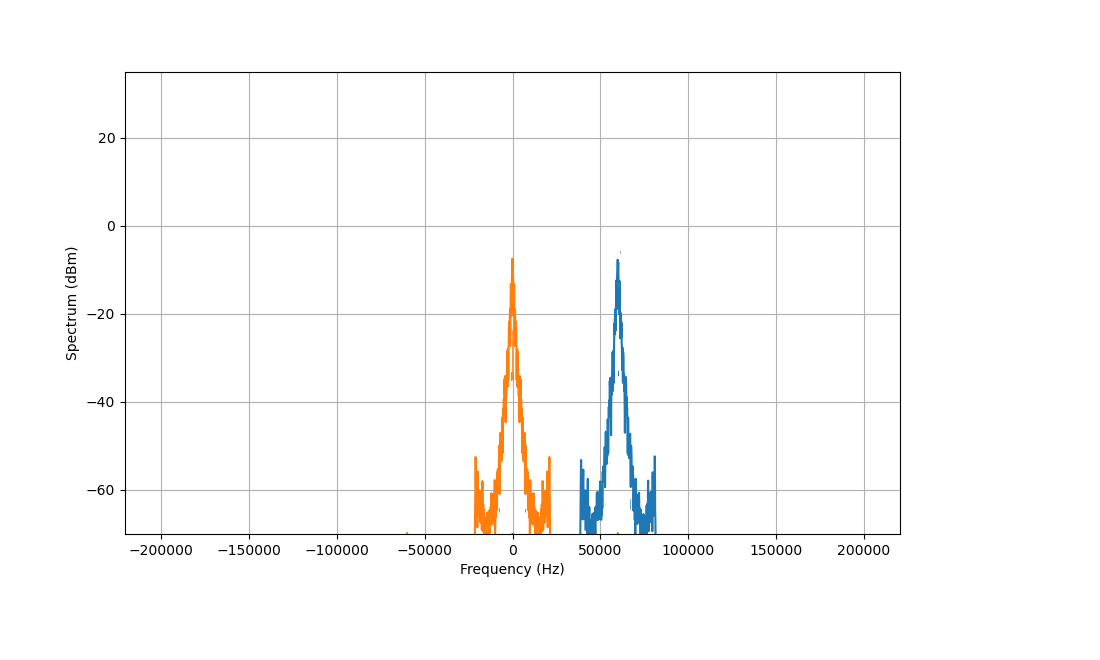

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import wave, sounddevice

from scipy.signal import welch, resample_poly

signal_frame_size = 10000  # количество отсчетов аудиофайла, получаемых за один раз
frames_number = 500        # число обрабатываемых пачек данных
rate_ratio = 10            # коэффициент увеличения частоты дискретизации
audio_amp = 2              # коэффициент усиления аудиосигнала
Fc = 60e3                  # частота несущей

freq_offset = 1000               # расстройка по частоте (Hz)

# открываем файл и получаем частоту дискретизации
signal_file = wave.open('../../wav/Audio_DSB_SC.wav')
signal_fs = signal_file.getframerate()

# частота дискретизации и размер кадра после передискретизации
audio_fs = signal_fs / rate_ratio
audio_frame_size = signal_frame_size / rate_ratio

# создаем объект PLL
am_pll = Costas_complex_pll(
    sample_frequency = signal_fs,
    noise_bandwidth = 100,
    damping_factor = 0.7,
    central_frequency = Fc + freq_offset,
    signal_amp = 0.0012
    )

# построение осей графиков
plt.rcParams['figure.figsize'] = [10, 6]
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Spectrum (dBm)')
ax.set_xlim(-signal_fs/2, signal_fs/2)
ax.set_ylim(-70, 35)
ax.grid(True)

# создаем линии для будущих графиков
for _ in range(2):
    ax.plot(np.arange(signal_frame_size), np.zeros(signal_frame_size))

message = []

t = np.linspace(0, signal_frame_size/signal_fs, signal_frame_size) 

for frame in range(frames_number):

    # формирование отсчетов аудиосигнала
    am_signal = signal_file.readframes(signal_frame_size)      # считываем отсчеты
    am_signal = np.frombuffer(am_signal, dtype=np.int16)       # преобразуем тип данных из byte в int16
    am_signal = np.reshape(am_signal, (-1, 2))                 # разделяем отсчеты для правого и левого канала
    am_signal = (am_signal[:,0] + 1j*am_signal[:,1]) / 2**15   # выделяем комплексный сигнал и нормируем отсчеты к единице
    
    # формируем несущую c помощью PLL
    _, baseband_signal = am_pll.step(am_signal)
    baseband_signal = baseband_signal - baseband_signal.mean()
    
    # построение спектрограмм
    signals = am_signal, baseband_signal
    
    for i in range(2):
        f, spectrum = welch(signals[i], signal_fs, return_onesided=False, scaling='spectrum', nperseg=4096) # вычисление спектров
        spectrum_dBm = 10*np.log10(spectrum) + 30                                                    # перевод значений в dBm
        ax.lines[i].set_xdata(f)
        ax.lines[i].set_ydata(spectrum_dBm)
    
    # уменьшение частоты дискретизации
    audio_data = resample_poly(baseband_signal, 1, rate_ratio)
    message = np.concatenate((message, audio_data))
    
    # отрисовка графиков
    fig.canvas.draw() 
    
    # обновляем отсчеты времени
    t = t + signal_frame_size/signal_fs 

sounddevice.play(message * audio_amp, audio_fs, blocking=True)

Выше представлены преобразования в частотной области. Синим обозначен спектр принимаемого АМ-сигнала. После схемы Костаса получется восстановленное информационное сообщение (оранжевый).

На слух можно оценить искажения при восстановлении сигнала. Как и для случая возвдения сигнала в квадрат, для не слишком больших расстроек по частоте информационное сообщение восстанавливается без икажений.

## Литература:
- B. P. Lathi Modern Digital and Analog Communication Systems 
- R. Stewart, K. Barlee, D. Atkinson, L. Crockett Software Defined Radio using MATLAB® & Simulink and the RTL-SDR
- F. Gardner Phaselock Techniques
- M. Rice Digital Communications. A Discrete Time Approach